## Check and ID Images not 80x80

In [11]:
import os
from PIL import Image

def check_image_dimensions(data_folder):
    for label in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, label)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path) and img_path.endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(img_path)
                    if img.size != (80, 80):
                        print(f"Image {filename} in folder {label} has dimensions {img.size}")

print("Train Set:")
train_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train'
check_image_dimensions(train_data_folder)

print("Validation Set:")
valid_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/valid'
check_image_dimensions(valid_data_folder)

print("Test Set:")
test_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test'
check_image_dimensions(test_data_folder)

Train Set:


KeyboardInterrupt: 

### Import Datasets

In [12]:
import numpy as np
import os 
from PIL import Image
def load_images_with_labels(data_folder):
    images = []
    labels = []
    for label in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, label)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path) and img_path.endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(img_path)
                    images.append(np.array(img))
                    labels.append(label)
    return images, labels

# Define the path to your data folder
train_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train'
validation_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/valid'
test_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test'

training_images, training_labels = load_images_with_labels(train_data_folder)
validation_images, validation_labels = load_images_with_labels(validation_data_folder)
test_images, test_labels = load_images_with_labels(test_data_folder)

# Example: Print the first image and its label
if training_images:
    first_image = Image.fromarray(training_images[0])
    first_image.show()
    print("Label:", training_labels[0])

# Example: Print the first image and its label
if validation_images:
    first_image = Image.fromarray(validation_images[0])
    first_image.show()
    print("Label:", validation_labels[0])
    # Example: Print the first image and its label

if test_images:
    first_image = Image.fromarray(test_images[0])
    first_image.show()
    print("Label:", test_labels[0])


Label: 1
Label: 1
Label: 1


### Sanity Check

In [13]:
print(len(training_images))
print(len(training_images[0]))
print(training_images[0])
print()
print(len(training_images[0][0]))
print(len(training_labels))
print(training_images[0][0])
print()
print(len(validation_images))
print(len(validation_images[0]))
print(len(validation_images[0][0]))
print(len(validation_labels))
print(validation_labels)
print()
print(len(test_images))
print(len(test_images[0]))
print(len(test_images[0][0]))
print(len(test_images))
print(test_images[0])


45387
80
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

80
45387
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]

5836
80
80
5836
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '105', '106', '106', '106', '106', '106', '106', '106', '106', '106', '106', '106', '1

### Train the CNN

#### Function Definitions

In [14]:
# Function to load images and labels
def load_images_with_labels(data_folder):
    images = []
    labels = []
    for label in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, label)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(img_path).convert('L')  # Convert to grayscale
                    img = img.resize((80, 80))  # Resize to 80x80
                    images.append(np.array(img))
                    labels.append(label)
    return np.array(images), np.array(labels)

# def preprocess_image(image_path):
#     # Load the image
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     # Resize the image to the input size of the CNN
#     image_resized = cv2.resize(image, (80, 80))
#     # Normalize the image
#     image_normalized = image_resized / 255.0
#     # Reshape the image to match the input shape of the CNN
#     image_reshaped = np.reshape(image_normalized, (1, 80, 80, 1))
#     return image_reshaped

#### Defining the CNN

In [15]:
# Defining the CNN architecture.
def create_sinhala_letter_id_cnn():
    model = models.Sequential([
        layers.Input(shape=(80, 80, 1)),  # Input layer with specified shape
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(454, activation='softmax')  # Assuming 454 labels.
    ])
    return model

#### Training 

In [16]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# Define the path to your data folder
train_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train'
validation_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/valid'

# Load the data
training_images, training_labels = load_images_with_labels(train_data_folder)
validation_images, validation_labels = load_images_with_labels(validation_data_folder)

# Normalize image data
training_images = training_images / 255.0
validation_images = validation_images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
encoded_training_labels = label_encoder.fit_transform(training_labels)
encoded_validation_labels = label_encoder.transform(validation_labels) 

# Reshape image data to add a channel dimension
training_images = np.expand_dims(training_images, axis=-1)
validation_images = np.expand_dims(validation_images, axis=-1)

# Check for NumPy version compatibility
if not hasattr(np, 'complex_'):
    np.complex_ = np.complex128

# Create an instance of the CNN.
sinhala_letter_cnn = create_sinhala_letter_id_cnn()

# Compile the model.
sinhala_letter_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary.
sinhala_letter_cnn.summary()

# Train the model.
history = sinhala_letter_cnn.fit(training_images, encoded_training_labels, epochs=40, validation_data=(validation_images, encoded_validation_labels))

# Save the trained model
sinhala_letter_cnn.save('./TrainedModels/CNN_50_60_trial_1.keras')

# Assuming you have `training_labels` from your dataset
label_encoder = LabelEncoder()
encoded_training_labels = label_encoder.fit_transform(training_labels)

# Save the classes
np.save('./TrainedModels/CNN_50_60_trial_1_classes.npy', label_encoder.classes_)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 78, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 454)            │        29,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,133,894 (4.33 MB)

 Trainable params: 1,133,894 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 106s 73ms/step - accuracy: 0.1172 - loss: 4.6251 - val_accuracy: 0.5410 - val_loss: 2.3500
Epoch 2/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 112s 79ms/step - accuracy: 0.6900 - loss: 1.2202 - val_accuracy: 0.7632 - val_loss: 1.6605
Epoch 3/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 115s 81ms/step - accuracy: 0.8922 - loss: 0.3831 - val_accuracy: 0.8269 - val_loss: 1.7533
Epoch 4/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 116s 82ms/step - accuracy: 0.9373 - loss: 0.2050 - val_accuracy: 0.8532 - val_loss: 1.8112
Epoch 5/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 116s 82ms/step - accuracy: 0.9611 - loss: 0.1276 - val_accuracy: 0.8544 - val_loss: 1.9276
Epoch 6/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 116s 82ms/step - accuracy: 0.9680 - loss: 0.1059 - val_accuracy: 0.8634 - val_loss: 1.8922
Epoch 7/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 116s 82ms/step - accuracy: 0.9720 - loss: 0.0937 - val_accuracy: 0.8754 - val_loss: 1.9990
Epoch 8/40
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 115s 81ms/step - accuracy: 

#### Plotting Performance 

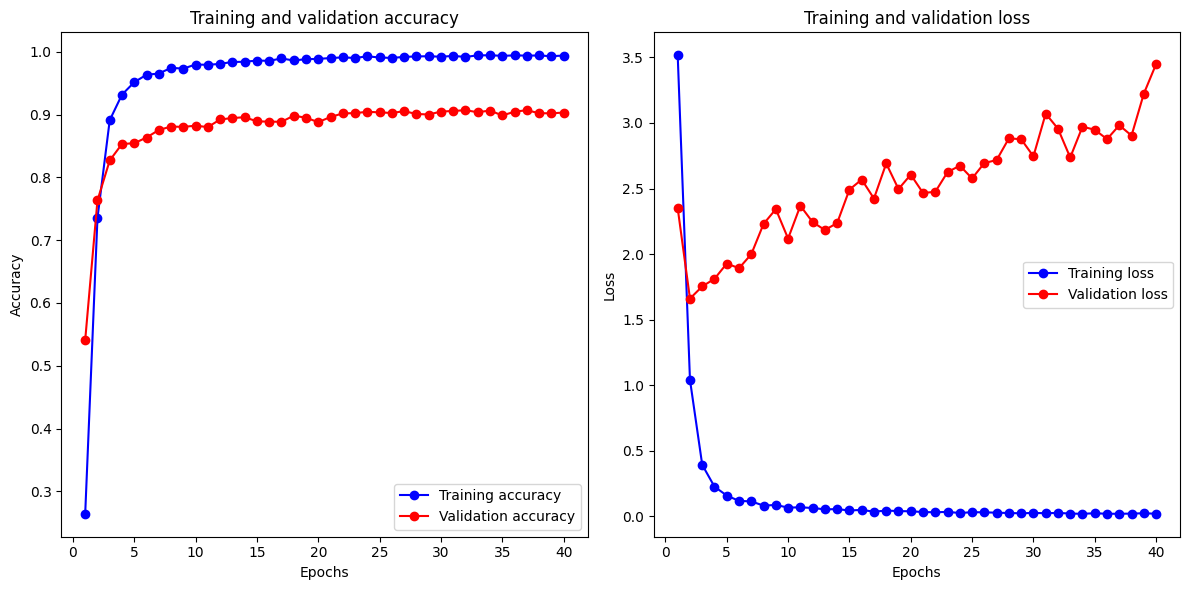

In [17]:
import matplotlib.pyplot as plt

# function to plot training and validation metrics
def plot_metrics(history):

    # Extracting values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Number of epochs
    epochs = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have already trained your model and have the history object
plot_metrics(history)  

### Testing

In [18]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import os

def load_images_with_labels(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        for image_name in os.listdir(label_folder):
            image_path = os.path.join(label_folder, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

# Path to the test data folder
test_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test'

# Load the test images and labels
test_images, test_labels = load_images_with_labels(test_data_folder)
test_images = test_images / 255.0  # Normalize the images
test_images = np.expand_dims(test_images, axis=-1)  # Add the channel dimension

# Load the label encoder used during training
label_encoder = LabelEncoder()

# Load the classes used during training
label_encoder.classes_ = np.load('./TrainedModels/CNN_50_60_trial_1_classes.npy') 
encoded_test_labels = label_encoder.transform(test_labels)

# Load the trained CNN model
model = load_model('./TrainedModels/CNN_50_60_trial_1.keras')

# Perform evaluation
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(encoded_test_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(encoded_test_labels, predicted_labels, target_names=label_encoder.classes_))


177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
Accuracy: 93.23%
              precision    recall  f1-score   support

           1       0.77      0.83      0.80        24
          10       1.00      0.79      0.88        24
         100       0.79      0.96      0.87        24
         105       0.96      1.00      0.98        24
         106       0.96      1.00      0.98        24
         107       0.87      0.83      0.85        24
         108       0.88      0.92      0.90        24
         109       0.95      0.88      0.91        24
          11       0.88      0.96      0.92        24
         110       1.00      0.96      0.98        24
         111       0.92      0.92      0.92        24
         112       0.85      0.92      0.88        24
         113       1.00      0.96      0.98        24
         114       0.89      1.00      0.94        24
          12       0.96      0.92      0.94        24
         120       1.00      0.92      0.96        24
         121       0.9

c:\Users\cmsmc\Desktop\Projects\SinhalaTranslator\Work\code\CNN\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmsmc\Desktop\Projects\SinhalaTranslator\Work\code\CNN\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cmsmc\Desktop\Projects\SinhalaTranslator\Work\code\CNN\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this